In [1]:
from utz import *
from njdot import crashes
from njdot.cc2mc2mn import cc2mc2mn

In [2]:
%%time
c = crashes.load()
c['cn'] = c['cc'].apply(lambda cc: cc2mc2mn[cc]['cn'])
c

Reading /Users/ryan/c/neighbor-ryan/nj-crashes/njdot/data/crashes.parquet


CPU times: user 5.5 s, sys: 1.35 s, total: 6.85 s
Wall time: 4.73 s


,year,cc,mc,case,dt,mc_dot,pdc,pdn,station,tk,ti,pk,pi,severity,Intersection,alcohol,hazmat,crash_type,tv,road,road_direction,route,Route Suffix,sri,mp,road_system,road_character,road_surface,surface_condition,light_condition,env_condition,road_divided,ttcz,cross_street_distance,Unit Of Measurement,Direction From Cross Street,cross_street,Is Ramp,ramp_route,Ramp To/From Route Direction,speed_limit,speed_limit_cross,olat,olon,cell_phone,Other Property Damage,Reporting Badge No.,occ,omc,reason,ilon,ilat,icc,imc,horizontal_alignment,road_grade,first_harmful_event,cn
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2001,1,1,#2001-17846,2001-12-21 18:34:00,1,01,Absecon City,MUNICIPAL COMP?,0,0,0,0,p,B,False,False,3,2,CALDERON AVENUE,,<NA>,,,NaN,7,2,2,1,6,1,5,01,100,FE,N,RT 30,,,,25,<NA>,NaN,NaN,False,NEVER SAW V-1 MINOR DAMAGE - NO INJURIES REPOR...,830,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
1,2001,1,1,01-00029,2001-01-01 09:30:00,1,1,Absecon,,0,0,0,0,p,B,False,False,6,2,RITZ DRIVE,,<NA>,,,NaN,7,1,2,3,6,1,5,01,<NA>,,,,,,,25,<NA>,NaN,NaN,False,,836,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
2,2001,1,1,01-004615,2001-04-10 14:44:00,1,1,Absecon,,0,4,0,0,i,I,False,False,3,2,MORTON AVENUE,,<NA>,,,NaN,7,1,2,1,1,1,5,01,<NA>,AT,,NEW YORK AVENUE,,,,25,<NA>,NaN,NaN,False,,836,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
3,2001,1,1,01-004880,2001-04-15 13:56:00,1,1,Absecon,,0,1,0,0,i,B,False,False,1,2,RT 30,,30,,00000030__,51.099998,2,1,2,1,1,1,5,01,<NA>,,,,,,,45,<NA>,NaN,NaN,False,WITNESS-PETRIA GIBSON AND ANGELO HERSH,886,<NA>,<NA>,None,-74.512308,39.432705,1,1,<NA>,<NA>,<NA>,Atlantic
4,2001,1,1,01-004912,2001-04-16 10:29:00,1,1,Absecon,,0,0,0,0,p,I,False,False,1,2,CR 651,,651,,,NaN,5,2,2,2,1,2,5,01,<NA>,AT,,CR 630,,,,35,<NA>,NaN,NaN,False,*BETH VEHICLES-RELIANCE INSURANCE CO.(215)864-...,836,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077298,2021,21,23,B150-2021-00117A,2021-05-26 21:08:00,23,02,New Jersey State Police,WASHINGTON - SQ,0,0,0,0,p,I,False,False,11,1,WARREN COUNTY 620,N,620,,21000620__,0.000000,5,<NA>,2,1,6,1,5,01,<NA>,AT,,ROUTE 519 / S BRIDGEVILLE RD,,,,50,50,40.80707,-75.07559,False,Damage to 10ft of Country road guardrail.,7837,21,23,None,-75.075607,40.807156,21,23,2,4,46,Warren
6077299,2021,21,23,B150-2021-00118A,2021-05-25 07:26:00,23,02,New Jersey State Police,WASHINGTON - SQ,0,0,0,0,p,I,False,False,1,2,MANUNKA CHUNK RD / UPPER SEREPTA RD **,W,<NA>,,21231034__,1.730000,7,<NA>,2,1,1,1,5,01,<NA>,AT,,MASSENATTS RD,,,,40,50,40.84466,-75.05549,False,,8610,21,23,None,-75.056122,40.844345,21,23,1,4,26,Warren
6077300,2021,21,23,B150-2021-00128A,2021-06-03 20:17:00,23,02,New Jersey State Police,WASHINGTON - SQ,0,0,0,0,p,B,False,False,12,1,ROUTE 519,S,519,,00000519__,44.000000,5,<NA>,2,2,5,4,5,01,<NA>,,,,,,,50,<NA>,40.80564,-75.07627,False,,8514,21,23,None,-75.015149,40.863108,21,23,3,4,24,Warren


In [3]:
%%time
nan_counts = c.isna().sum(axis=0)
nan_counts[nan_counts > 0]

CPU times: user 2.15 s, sys: 383 ms, total: 2.54 s
Wall time: 2.89 s


crash_type                  3529
route                    2446541
mp                       2367547
road_system                  423
road_character           1287797
road_surface               17012
surface_condition          19501
light_condition            27559
env_condition              23882
road_divided              136469
cross_street_distance    3639813
speed_limit               799945
speed_limit_cross        3353100
olat                     4821948
olon                     4821948
occ                      4826243
omc                      4826243
reason                   3473406
ilon                     2603897
ilat                     2603897
icc                      2604187
imc                      2604187
horizontal_alignment     4815269
road_grade               4818009
first_harmful_event      4885329
dtype: int64

In [4]:
y = c.dt.dt.year.rename('Year')

In [5]:
missing_mp = c['mp'].isna().rename('missing_mp')
no_mp = c[missing_mp]
yes_mp = c[~missing_mp]
no_mp

,year,cc,mc,case,dt,mc_dot,pdc,pdn,station,tk,ti,pk,pi,severity,Intersection,alcohol,hazmat,crash_type,tv,road,road_direction,route,Route Suffix,sri,mp,road_system,road_character,road_surface,surface_condition,light_condition,env_condition,road_divided,ttcz,cross_street_distance,Unit Of Measurement,Direction From Cross Street,cross_street,Is Ramp,ramp_route,Ramp To/From Route Direction,speed_limit,speed_limit_cross,olat,olon,cell_phone,Other Property Damage,Reporting Badge No.,occ,omc,reason,ilon,ilat,icc,imc,horizontal_alignment,road_grade,first_harmful_event,cn
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2001,1,1,#2001-17846,2001-12-21 18:34:00,1,01,Absecon City,MUNICIPAL COMP?,0,0,0,0,p,B,False,False,3,2,CALDERON AVENUE,,<NA>,,,NaN,7,2,2,1,6,1,5,01,100,FE,N,RT 30,,,,25,<NA>,NaN,NaN,False,NEVER SAW V-1 MINOR DAMAGE - NO INJURIES REPOR...,830,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
1,2001,1,1,01-00029,2001-01-01 09:30:00,1,1,Absecon,,0,0,0,0,p,B,False,False,6,2,RITZ DRIVE,,<NA>,,,NaN,7,1,2,3,6,1,5,01,<NA>,,,,,,,25,<NA>,NaN,NaN,False,,836,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
2,2001,1,1,01-004615,2001-04-10 14:44:00,1,1,Absecon,,0,4,0,0,i,I,False,False,3,2,MORTON AVENUE,,<NA>,,,NaN,7,1,2,1,1,1,5,01,<NA>,AT,,NEW YORK AVENUE,,,,25,<NA>,NaN,NaN,False,,836,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
4,2001,1,1,01-004912,2001-04-16 10:29:00,1,1,Absecon,,0,0,0,0,p,I,False,False,1,2,CR 651,,651,,,NaN,5,2,2,2,1,2,5,01,<NA>,AT,,CR 630,,,,35,<NA>,NaN,NaN,False,*BETH VEHICLES-RELIANCE INSURANCE CO.(215)864-...,836,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
7,2001,1,1,01-007162,2001-06-05 14:41:00,1,1,Absecon,,0,1,0,1,i,B,False,False,13,1,CONNECTICUT AVENUE,,<NA>,,,NaN,7,1,2,1,1,1,5,01,75,FE,W,IRELAN AVENUE,,,,25,<NA>,NaN,NaN,False,NONE,836,<NA>,<NA>,No MP,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077279,2021,21,23,B150-2021-00038A,2021-02-06 09:59:00,23,02,New Jersey State Police,WASHINGTON - SQ,0,0,0,0,p,B,False,False,6,2,472 US HIGHWAY 46 HW,W,<NA>,,,NaN,9,<NA>,3,2,5,3,5,01,<NA>,,,,,,,50,<NA>,40.84022,-75.03218,False,,8518,21,23,No MP,NaN,NaN,<NA>,<NA>,1,4,28,Warren
6077285,2021,21,23,B150-2021-00073A,2021-03-29 12:42:00,23,02,New Jersey State Police,WASHINGTON - SQ,0,0,0,0,p,B,False,False,6,2,COUNTY RD,W,<NA>,,,NaN,9,<NA>,2,1,1,1,5,01,<NA>,,,,,,,5,<NA>,40.81220,-75.04940,False,,8543,21,23,No MP,NaN,NaN,<NA>,<NA>,1,4,26,Warren
6077286,2021,21,23,B150-2021-00074A,2021-03-29 18:23:00,23,02,New Jersey State Police,WASHINGTON - SQ,0,0,0,0,p,B,False,False,3,2,RIDGE RD,W,<NA>,,,NaN,7,<NA>,2,1,1,1,5,01,<NA>,,,,,,,25,<NA>,40.74680,-75.13740,False,,8514,21,10,No MP,NaN,NaN,<NA>,<NA>,3,5,26,Warren


In [6]:
empty_mp = c['mp'] == ''
empty_mp.sum()

0

In [7]:
missing_mp

id
0           True
1           True
2           True
3          False
4           True
           ...  
6077298    False
6077299    False
6077300    False
6077301    False
6077302     True
Name: missing_mp, Length: 6077303, dtype: bool

In [8]:
missing_ll = (c['olat'].isna() | c['olon'].isna()).rename('missing_ll')
missing_ll

id
0           True
1           True
2           True
3           True
4           True
           ...  
6077298    False
6077299    False
6077300    False
6077301    False
6077302    False
Name: missing_ll, Length: 6077303, dtype: bool

In [9]:
ct = pd.crosstab((~missing_mp).rename('has_mp'), (~missing_ll).rename('has_ll'))

ct2 = pd.concat([ct, ct.sum(1)], axis=1)
ct2.columns = [ *ct.columns, 'total' ]
ct2.columns.name = ct.columns.name

ct3 = pd.concat([ ct2, ct2.sum(0).to_frame().T ])
ct3.index = [ *ct2.index, 'total' ]
ct3.index.name = ct2.index.name

pct = round(ct3 / ct3.loc['total', 'total'] * 100, 1)
print("Percentages:")
pct

Percentages:


has_ll,False,True,total
has_mp,,,
False,38.3,0.7,39.0
True,41.1,20.0,61.0
total,79.3,20.7,100.0


In [10]:
cyms = (
    c
    .groupby(['cn', y, missing_mp, missing_ll])
    .size()
    .rename('# Crashes')
    .reset_index(level=[2, 3])
)
cyms

missing_mp  missing_ll  # Crashes
cn       Year                                   
Atlantic 2001       False        True       4797
         2001        True        True       4942
         2002       False        True       5338
         2002        True        True       4403
         2003       False       False         34
...                   ...         ...        ...
Warren   2020        True        True        121
         2021       False       False        874
         2021       False        True       1593
         2021        True       False        102
         2021        True        True        158

[1294 rows x 3 columns]

In [11]:
cym_by_missing = cyms.pivot(columns=['missing_mp', 'missing_ll'], values='# Crashes').fillna(0)

cym_by_missing.columns = [
    f'{"!mp" if mmp else "mp"} {"!ll" if mll else "ll"}'
    for mmp, mll in cym_by_missing.columns
]

cym_by_missing[ 'mp'] = cym_by_missing[ 'mp ll'] + cym_by_missing[ 'mp !ll']
cym_by_missing['!mp'] = cym_by_missing['!mp ll'] + cym_by_missing['!mp !ll']
cym_by_missing[ 'll'] = cym_by_missing[ 'mp ll'] + cym_by_missing[ '!mp ll']
cym_by_missing['!ll'] = cym_by_missing['mp !ll'] + cym_by_missing['!mp !ll']
total = cym_by_missing['mp'] + cym_by_missing['!mp']
assert (total == cym_by_missing['ll'] + cym_by_missing['!ll']).all()
cym_by_missing

mp !ll  !mp !ll   mp ll  !mp ll      mp     !mp      ll  \
cn       Year                                                            
Atlantic 2001  4797.0   4942.0     0.0     0.0  4797.0  4942.0     0.0   
         2002  5338.0   4403.0     0.0     0.0  5338.0  4403.0     0.0   
         2003  7321.0   2949.0    34.0     0.0  7355.0  2949.0    34.0   
         2004  7592.0   3223.0    35.0     0.0  7627.0  3223.0    35.0   
         2005  7268.0   3188.0    52.0     0.0  7320.0  3188.0    52.0   
...               ...      ...     ...     ...     ...     ...     ...   
Warren   2017   882.0    548.0  1306.0   405.0  2188.0   953.0  1711.0   
         2018  1380.0    712.0  1206.0   222.0  2586.0   934.0  1428.0   
         2019  1512.0    500.0  1193.0   168.0  2705.0   668.0  1361.0   
         2020  1493.0    121.0   926.0   138.0  2419.0   259.0  1064.0   
         2021  1593.0    158.0   874.0   102.0  2467.0   260.0   976.0   

                   !ll  
cn       Year           
Atlantic 2001   9739.0  
         2002   9741.0  
         2003  10270.0  
         2004  10815.0  
         2005  10456.0  
...                ...  
Warren   2017   1430.0  
         2018   2092.0  
         2019   2012.0  
         2020   1614.0  
         2021   1751.0  

[441 rows x 8 columns]

In [12]:
cym_by_missing['!mp ll'] / total

cn        Year
Atlantic  2001    0.000000
          2002    0.000000
          2003    0.000000
          2004    0.000000
          2005    0.000000
                    ...   
Warren    2017    0.128940
          2018    0.063068
          2019    0.049807
          2020    0.051531
          2021    0.037404
Length: 441, dtype: float64

In [13]:
missing_ll.sum(), (~missing_ll).sum()

(4821948, 1255355)

In [14]:
(c['olat'] == '').sum(), (c['olon'] == '').sum()

(0, 0)

In [15]:
def compute_missing_pct(s, name=None, pct_name=None):
    if name:
        s = s.rename(name)
    else:
        if not s.name:
            raise ValueError('Pass name kwarg or give series a name')
        name = s.name
    pct_name = pct_name or f'% {name}'
    cyms = (
        c
        .groupby(['cn', y, s])
        .size()
        .rename('# Crashes')
        .reset_index(level=2)
    )
    cym_by_missing = cyms.pivot(columns=name, values='# Crashes')
    cy_num_crashes = cym_by_missing.sum(axis=1).rename('# Crashes')
    cy_missing_pct = (
        cym_by_missing
        .apply(lambda r: r[True] / r.sum(), axis=1)
        .rename(pct_name)
    )

    cy_stats = sxs(
        cy_missing_pct,
        cy_num_crashes,
    ).reset_index()
    return cy_stats

In [16]:
mmp = compute_missing_pct(missing_mp, pct_name='% Missing MP')
mmp

,cn,Year,% Missing MP,# Crashes
0,Atlantic,2001,0.507444,9739
1,Atlantic,2002,0.452007,9741
2,Atlantic,2003,0.286200,10304
3,Atlantic,2004,0.297051,10850
4,Atlantic,2005,0.303388,10508
...,...,...,...,...
436,Warren,2017,0.303407,3141
437,Warren,2018,0.265341,3520
438,Warren,2019,0.198043,3373
439,Warren,2020,0.096714,2678


In [17]:
mll = compute_missing_pct(missing_ll, pct_name='% Missing LL')
mll

,cn,Year,% Missing LL,# Crashes
0,Atlantic,2001,1.000000,9739.0
1,Atlantic,2002,1.000000,9741.0
2,Atlantic,2003,0.996700,10304.0
3,Atlantic,2004,0.996774,10850.0
4,Atlantic,2005,0.995051,10508.0
...,...,...,...,...
436,Warren,2017,0.455269,3141.0
437,Warren,2018,0.594318,3520.0
438,Warren,2019,0.596502,3373.0
439,Warren,2020,0.602689,2678.0


In [18]:
ll_no_mp = compute_missing_pct(missing_mp & ~missing_ll, name='ll_no_mp', pct_name='% has LL, no MP').fillna(0)
ll_no_mp

,cn,Year,"% has LL, no MP",# Crashes
0,Atlantic,2001,0.000000,9739.0
1,Atlantic,2002,0.000000,9741.0
2,Atlantic,2003,0.000000,10304.0
3,Atlantic,2004,0.000000,10850.0
4,Atlantic,2005,0.000000,10508.0
...,...,...,...,...
436,Warren,2017,0.128940,3141.0
437,Warren,2018,0.063068,3520.0
438,Warren,2019,0.049807,3373.0
439,Warren,2020,0.051531,2678.0


In [19]:
ll_or_mp = compute_missing_pct(~missing_mp | ~missing_ll, name='ll_or_mp', pct_name='% has LL or MP')
ll_or_mp

,cn,Year,% has LL or MP,# Crashes
0,Atlantic,2001,0.492556,9739
1,Atlantic,2002,0.547993,9741
2,Atlantic,2003,0.713800,10304
3,Atlantic,2004,0.702949,10850
4,Atlantic,2005,0.696612,10508
...,...,...,...,...
436,Warren,2017,0.825533,3141
437,Warren,2018,0.797727,3520
438,Warren,2019,0.851764,3373
439,Warren,2020,0.954817,2678


In [20]:
import plotly.express as px
from nj_crashes.utils.show import show, interactive

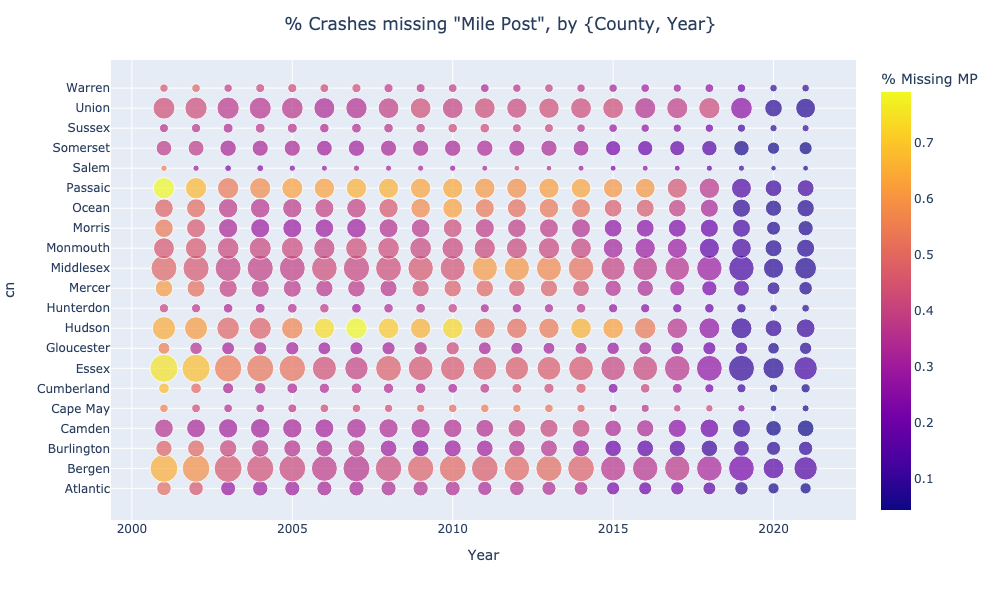

In [21]:
fig = px.scatter(
    mmp,
    x='Year',
    y='cn',
    size='# Crashes',
    color='% Missing MP',
).update_layout(
    title=dict(
        text="% Crashes missing \"Mile Post\", by {County, Year}",
        x=0.5,
    ),
)

show(fig)

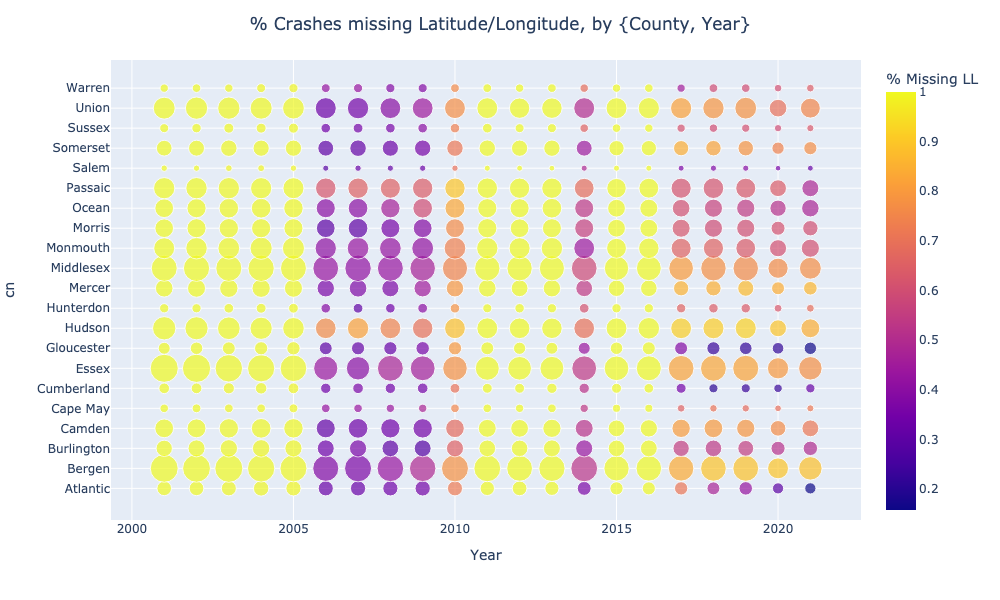

In [22]:
fig = px.scatter(
    mll,
    x='Year',
    y='cn',
    size='# Crashes',
    color='% Missing LL',
).update_layout(
    title=dict(
        text="% Crashes missing Latitude/Longitude, by {County, Year}",
        x=0.5,
    ),
)

show(fig)

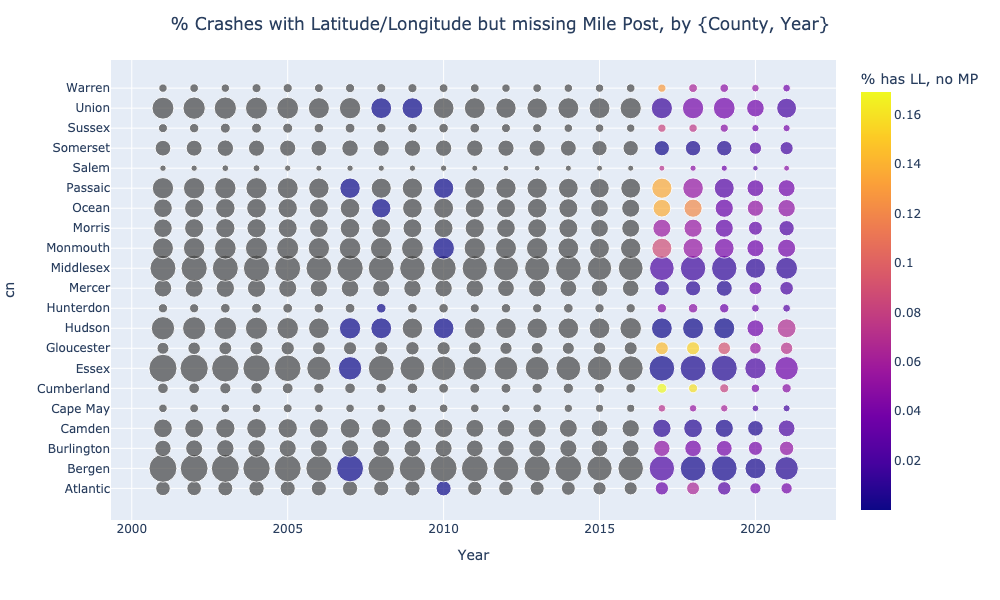

In [23]:
fig = px.scatter(
    ll_no_mp.replace(0, nan),
    x='Year',
    y='cn',
    size='# Crashes',
    color='% has LL, no MP',
).update_layout(
    title=dict(
        text="% Crashes with Latitude/Longitude but missing Mile Post, by {County, Year}",
        x=0.5,
    ),
)

show(fig)

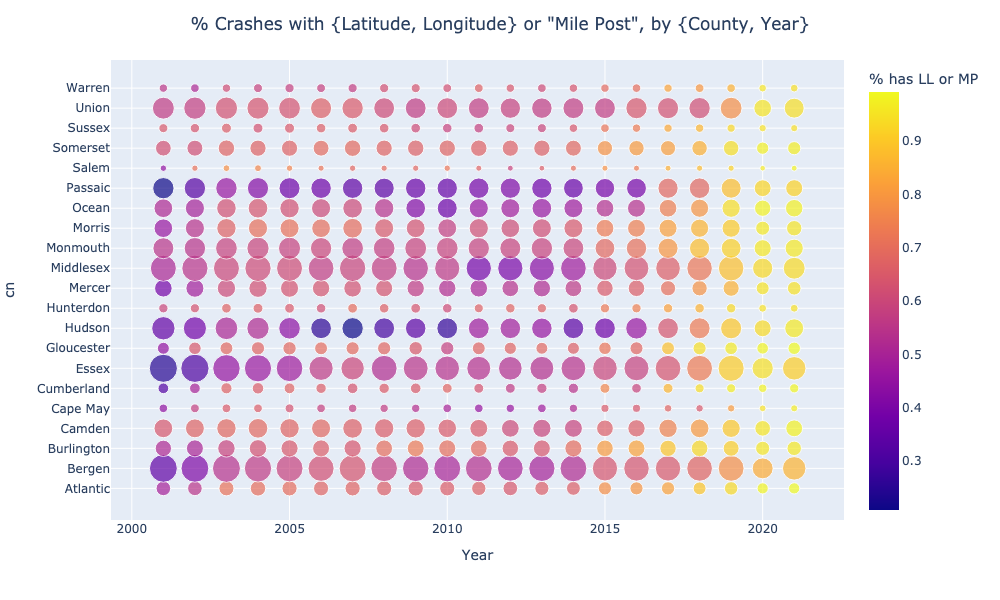

In [24]:
fig = px.scatter(
    ll_or_mp,
    x='Year',
    y='cn',
    size='# Crashes',
    color='% has LL or MP',
).update_layout(
    title=dict(
        text='% Crashes with {Latitude, Longitude} or "Mile Post", by {County, Year}',
        x=0.5,
    ),
)

show(fig)

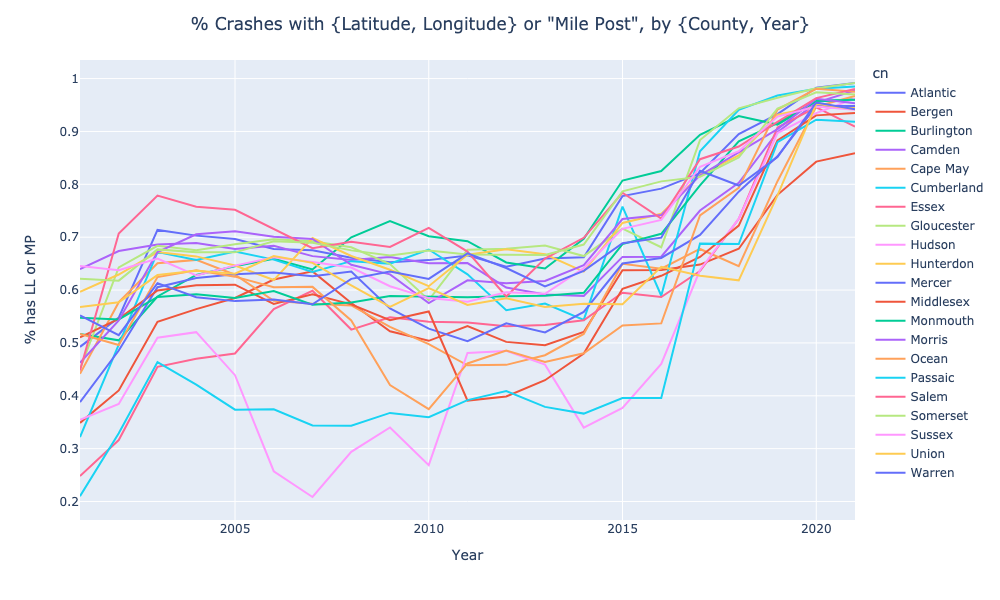

In [25]:
fig = px.line(
    ll_or_mp,
    x='Year',
    y='% has LL or MP',
    color='cn',
).update_layout(
    hovermode='x',
    title=dict(
        text='% Crashes with {Latitude, Longitude} or "Mile Post", by {County, Year}',
        x=0.5,
    ),
).update_traces(
    hovertemplate="%{y:.0%}",
)

show(fig)